In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
print('All libraries imported')

All libraries imported


1. Preliminary analysis:

Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.
Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

In [41]:
#load the data
data = pd.read_excel('data.xlsx')

In [42]:
#EDA
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
data.shape

(303, 14)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
# check for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
#unique values
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [48]:
duplicated_data = data[data.duplicated(keep= False)]
duplicated_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


2. Prepare an informative report about the data explaining the distribution of the disease and the related factors. You could use the below approach to achieve the objective

Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot
Study the occurrence of CVD across Age.
Study the composition of overall patients w.r.t. Gender.
Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?
Describe the relationship between Cholesterol levels and our target variable.
What can be concluded about the relationship between peak exercising and the occurrence of a heart attack.
Is thalassemia a major cause of CVD?
How are the other factors determining the occurrence of CVD?
Use a pair plot to understand the relationship between all the given variables.

In [49]:
#target values
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Diseases classes')

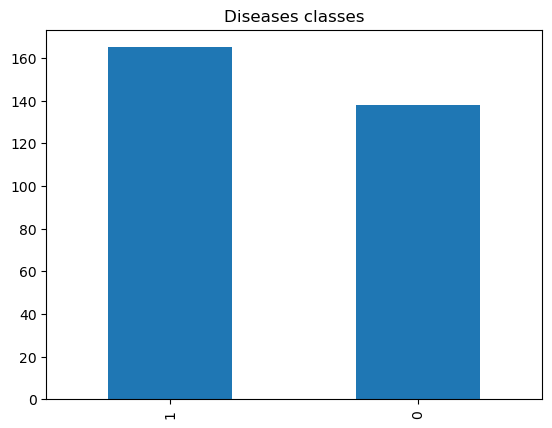

In [50]:
#EDA on Heart Diseases
data['target'].value_counts().plot(kind='bar')
plt.title('Diseases classes')

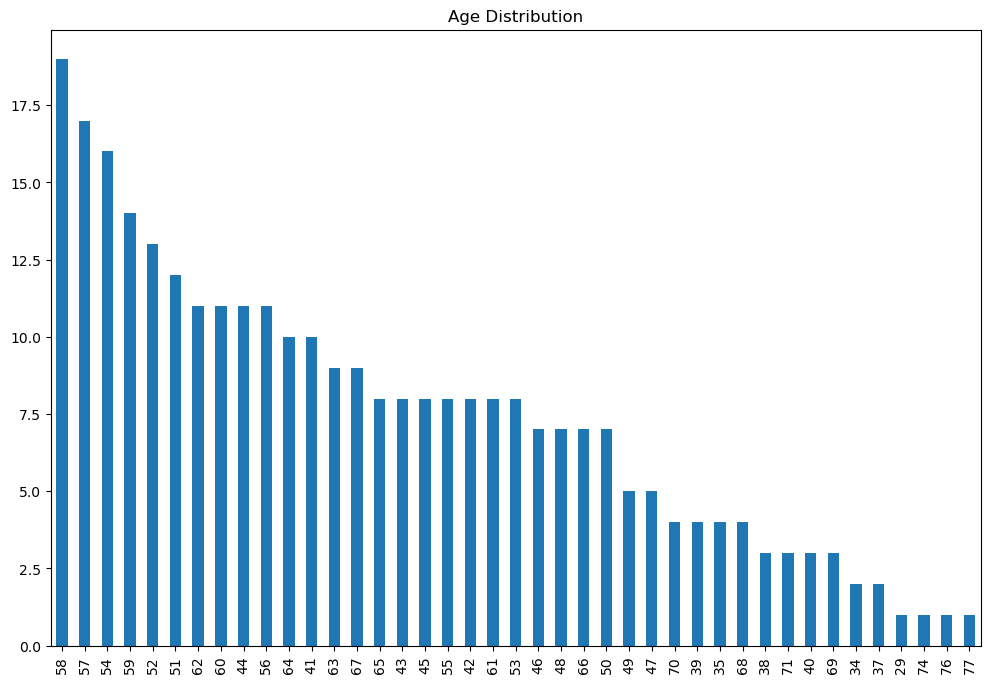

In [51]:
#distribution of age
plt.figure(figsize=(12,8))
data['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.show()

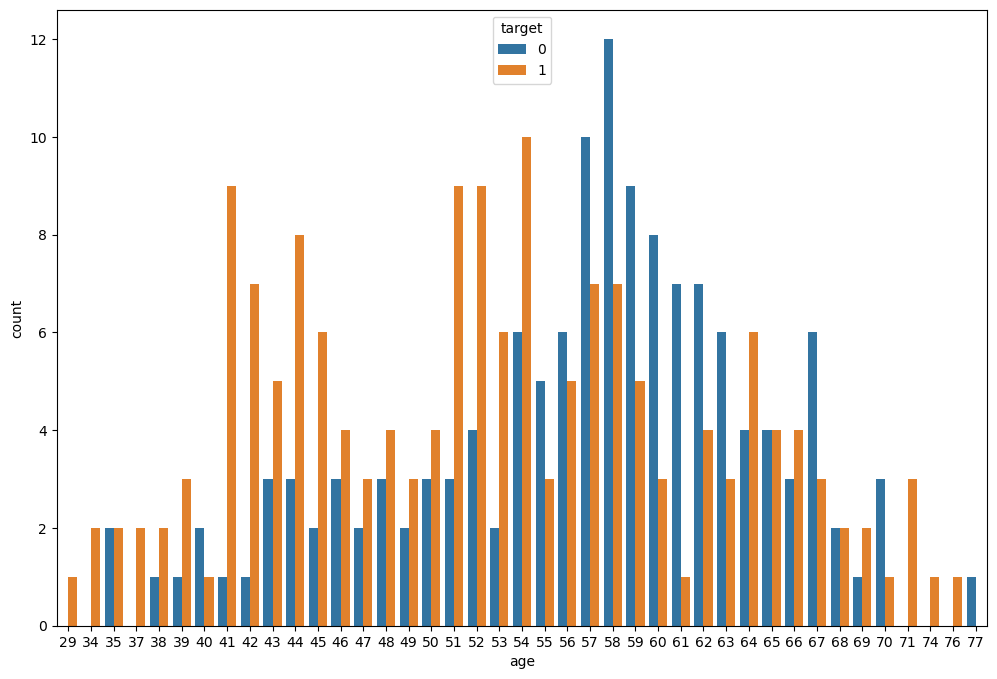

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x=data['age'],hue ='target',data = data)
plt.show()

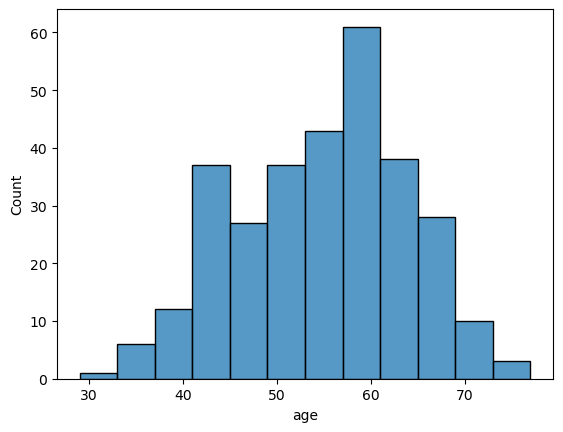

In [53]:
#plt.figure(figsize=(12,8))
sns.histplot(x=data['age'],data = data)
plt.show()

In [54]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [55]:
print(data['sex'].value_counts())

1    207
0     96
Name: sex, dtype: int64


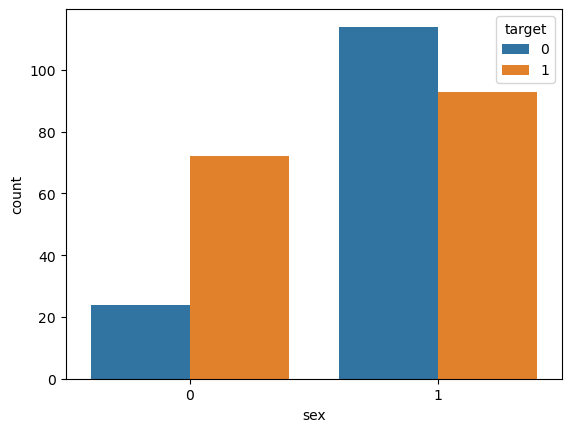

In [56]:
#plt.figure(figsize=(12,8))
sns.countplot(x=data['sex'],hue ='target',data = data)
plt.show()

In [57]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:>

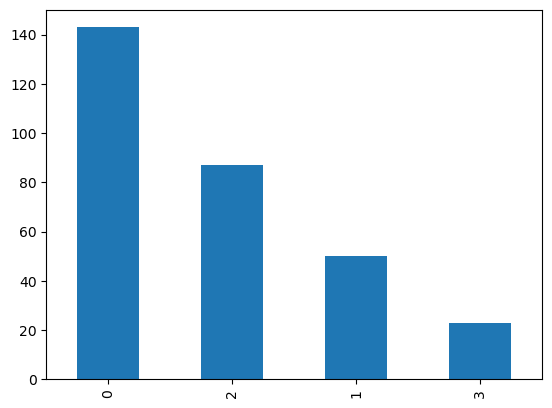

In [59]:
data['cp'].value_counts().plot(kind ='bar')

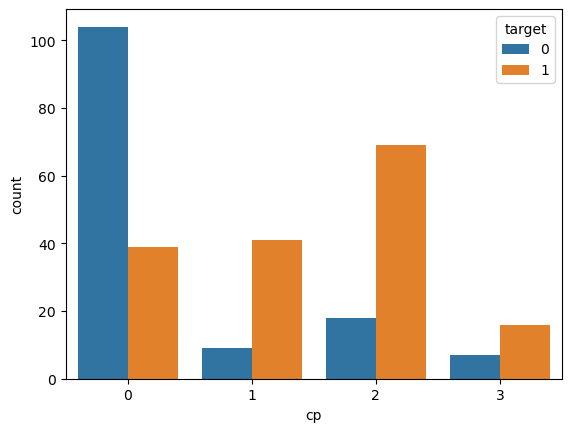

In [60]:
#plt.figure(figsize=(12,8))
sns.countplot(x=data['cp'],hue ='target',data = data)
plt.show()

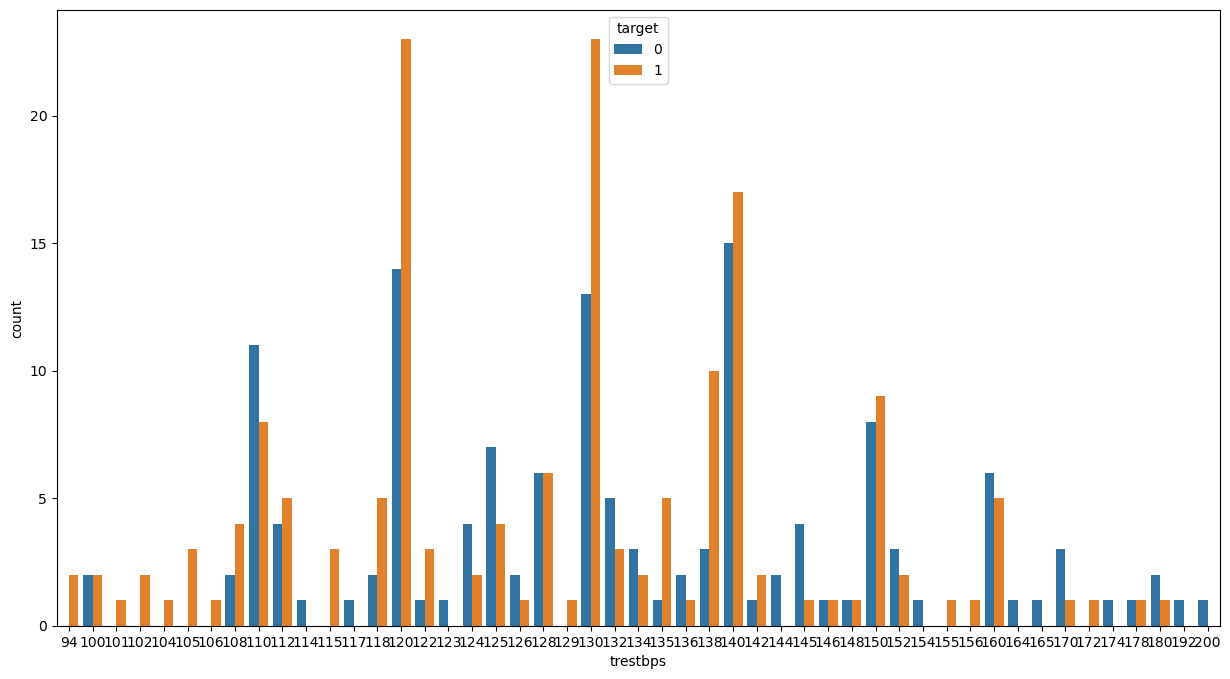

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['trestbps'],hue ='target',data = data)
plt.show()

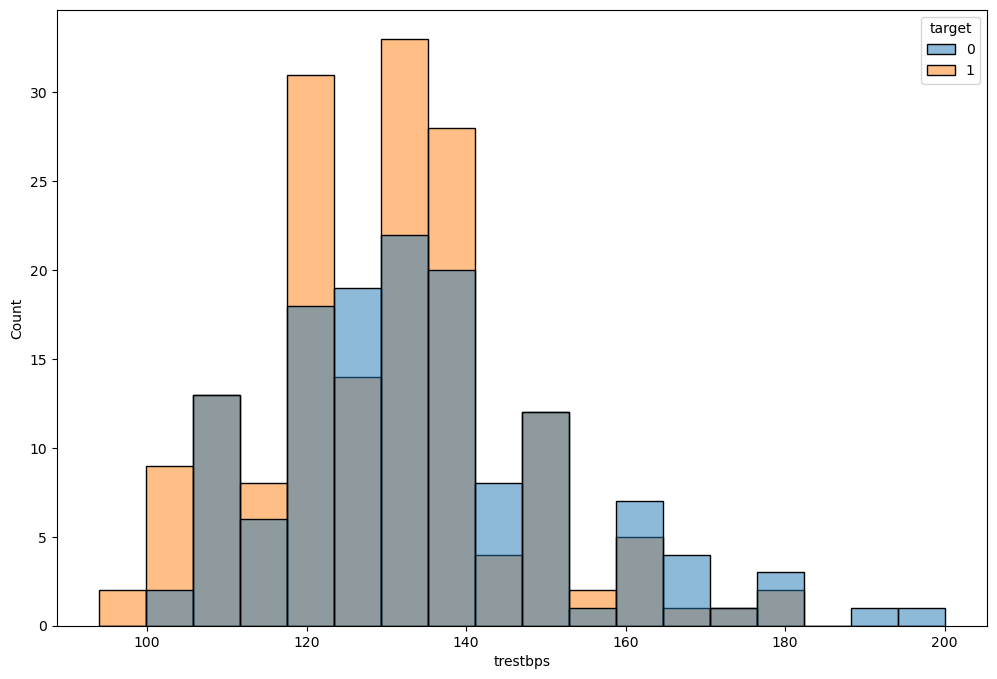

In [62]:
plt.figure(figsize=(12,8))
sns.histplot(x=data['trestbps'],hue ='target',data = data)
plt.show()

In [63]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [64]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

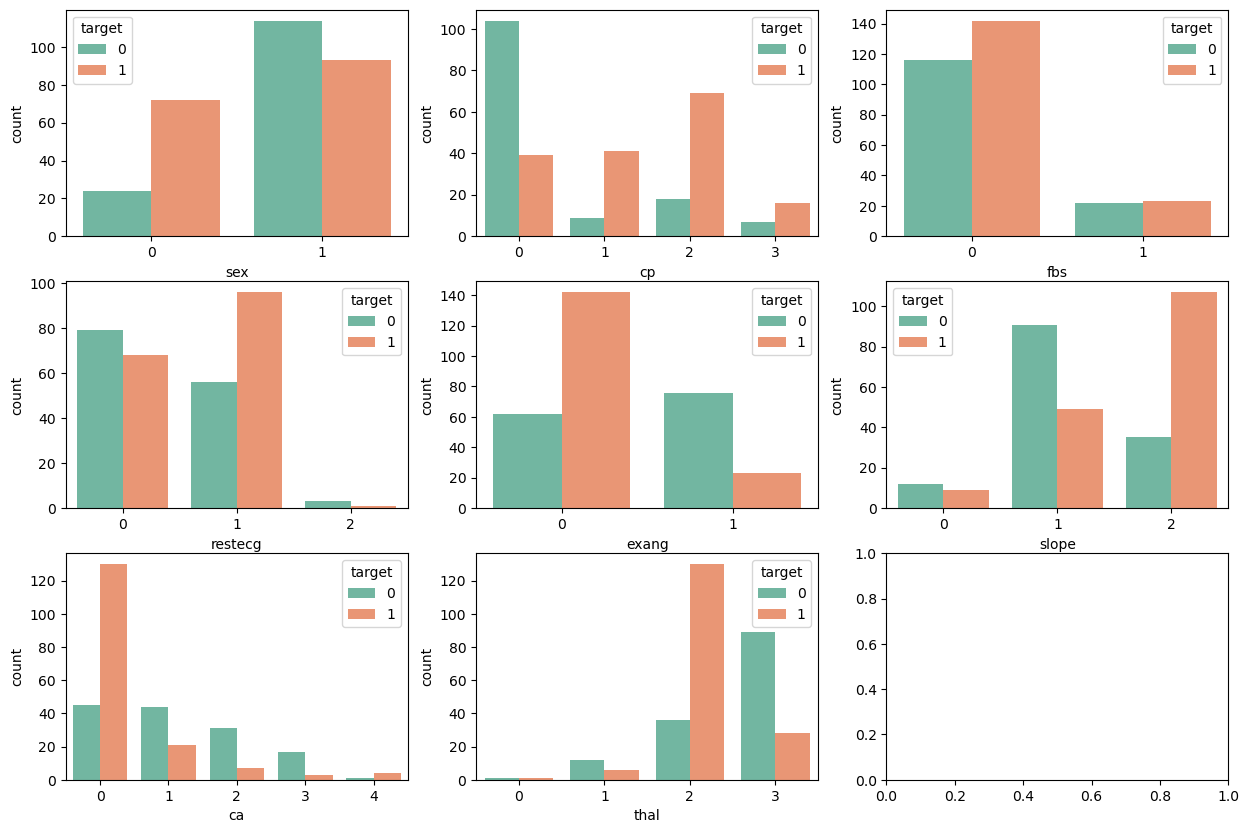

In [65]:
#create a subplot
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))

cat_features=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

for idx,feature in enumerate(cat_features):

    if feature!='target':

        ax=axes[int(idx/3),idx%3]

        sns.countplot(x=feature,hue='target',ax=ax,data=data,palette='Set2')

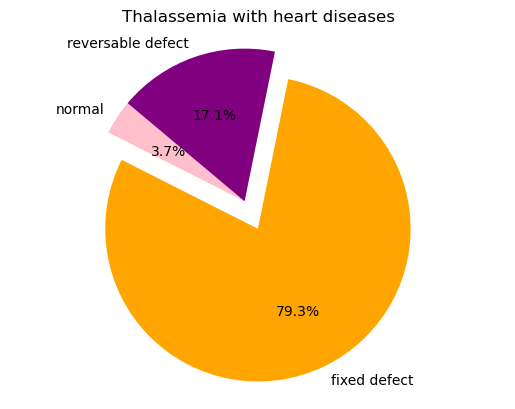

In [66]:
#create pie chart -have heart disease
labels = 'normal', 'fixed defect','reversable defect'
sizes = [6,130,28]
explode=[0,0.2,0]
colors = ['pink', 'orange', 'purple']
plt.pie(sizes, labels=labels, autopct = '%.1f%%',colors=colors,explode= explode, startangle=140)
plt.axis('equal')
plt.title('Thalassemia with heart diseases')
plt.show()

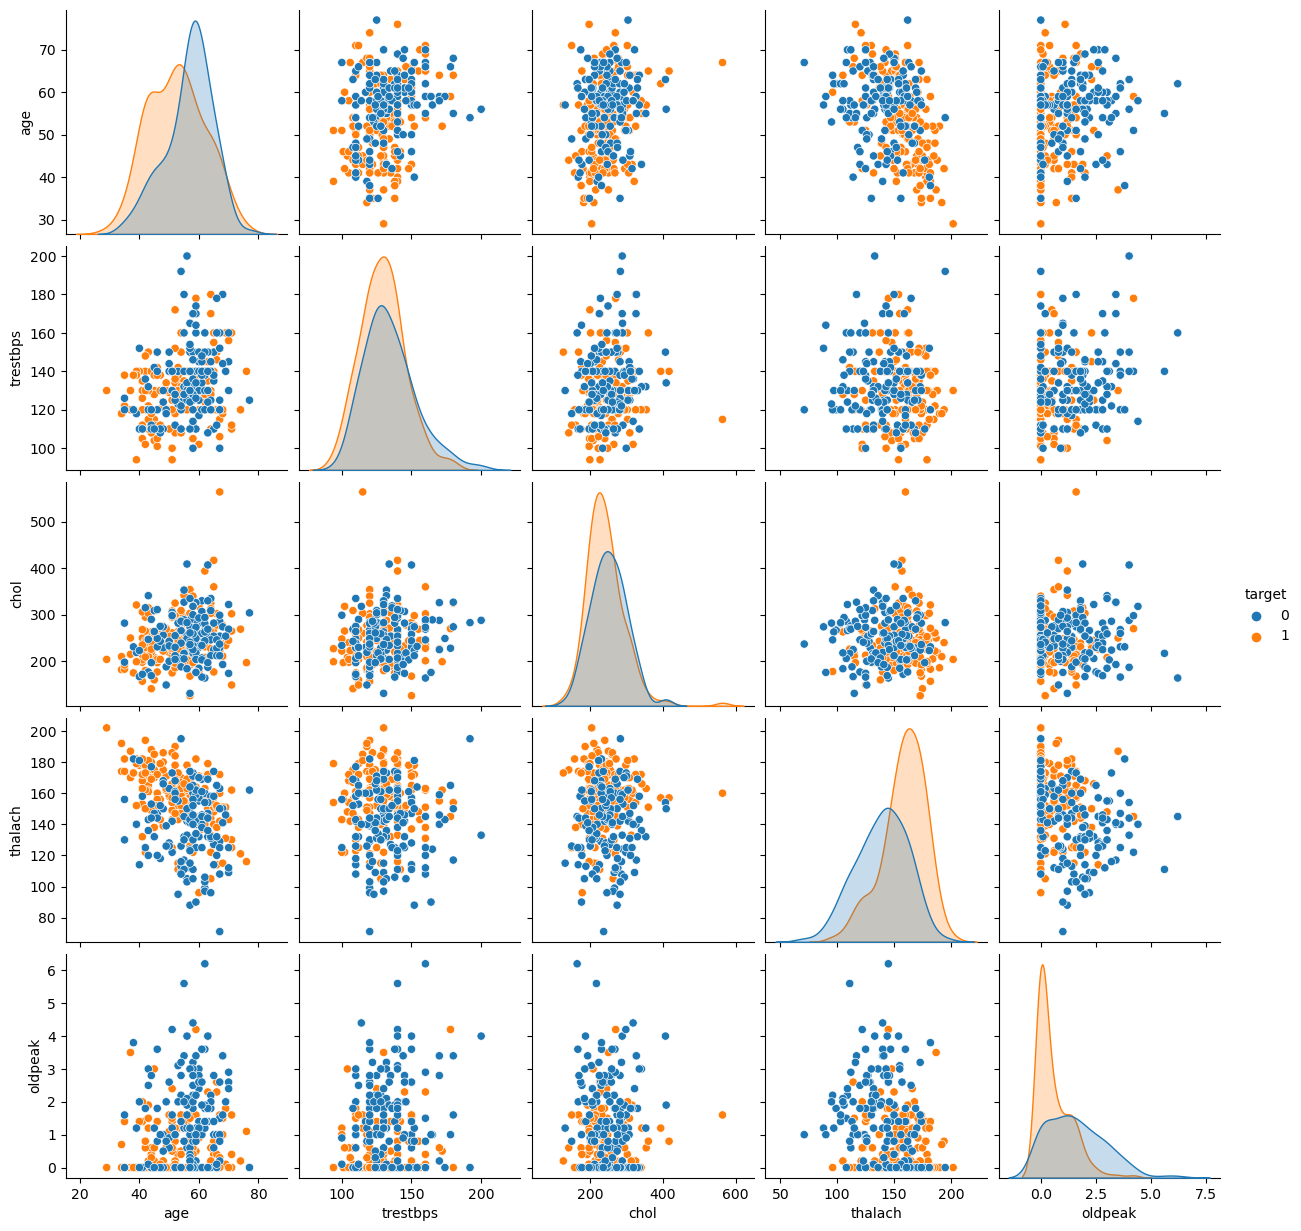

In [67]:
num_var=['age','trestbps','chol','thalach','oldpeak'] 

sns.pairplot(data[num_var+['target']],hue='target')    

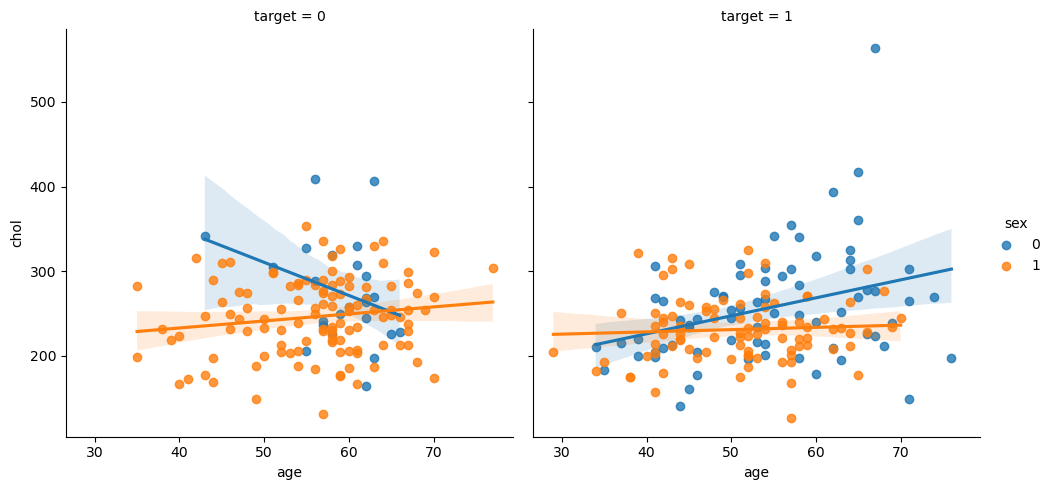

In [68]:
# create a plot to understand the relationship between age and chol, according to target
sns.lmplot(x='age', y ='chol',hue = 'sex', col='target', data= data)
plt.show()

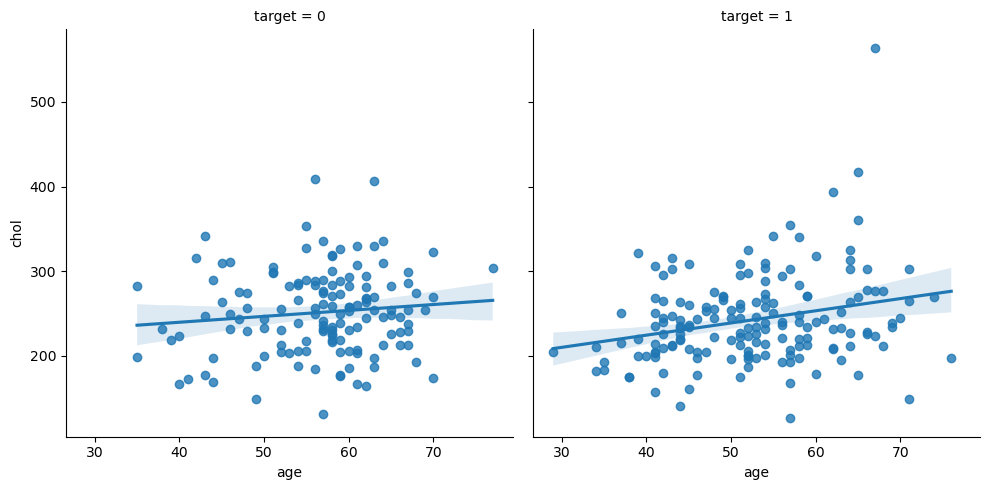

In [69]:
# create a plot to understand the relationship between age and chol, according to target
sns.lmplot(x='age', y ='chol', col='target', data= data)
plt.show()

In [70]:
 data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

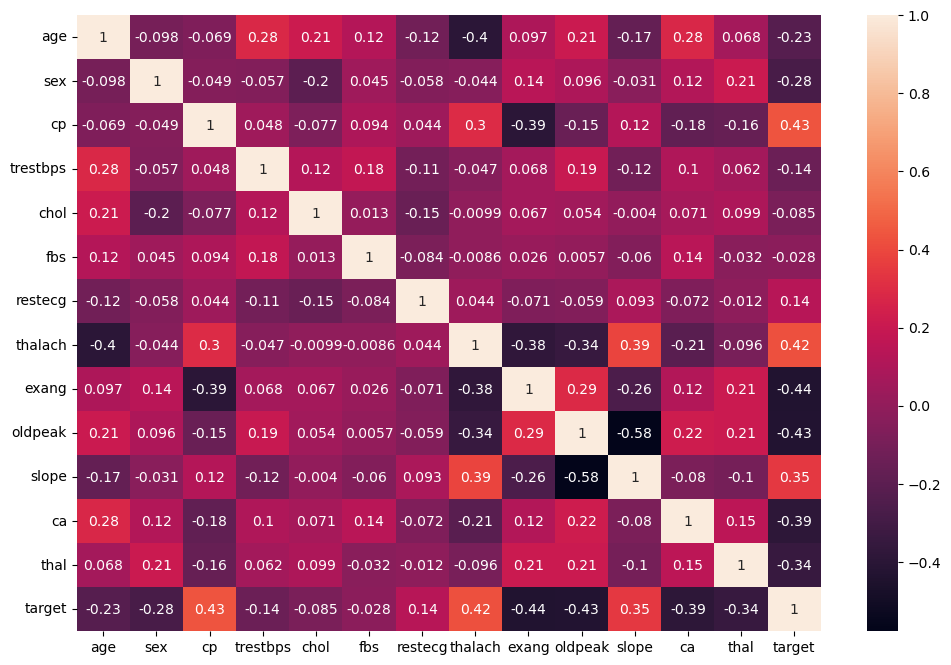

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

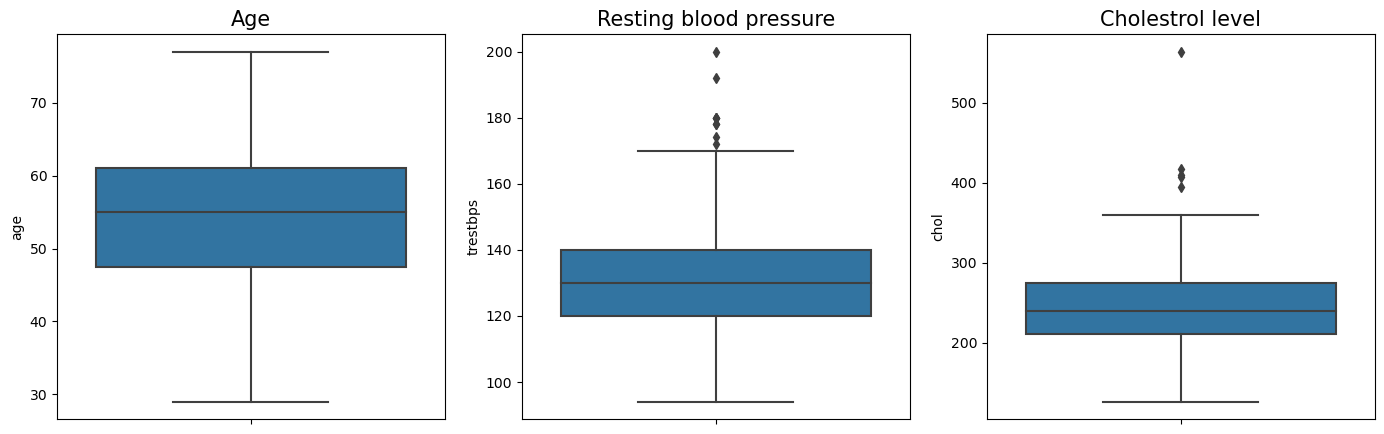

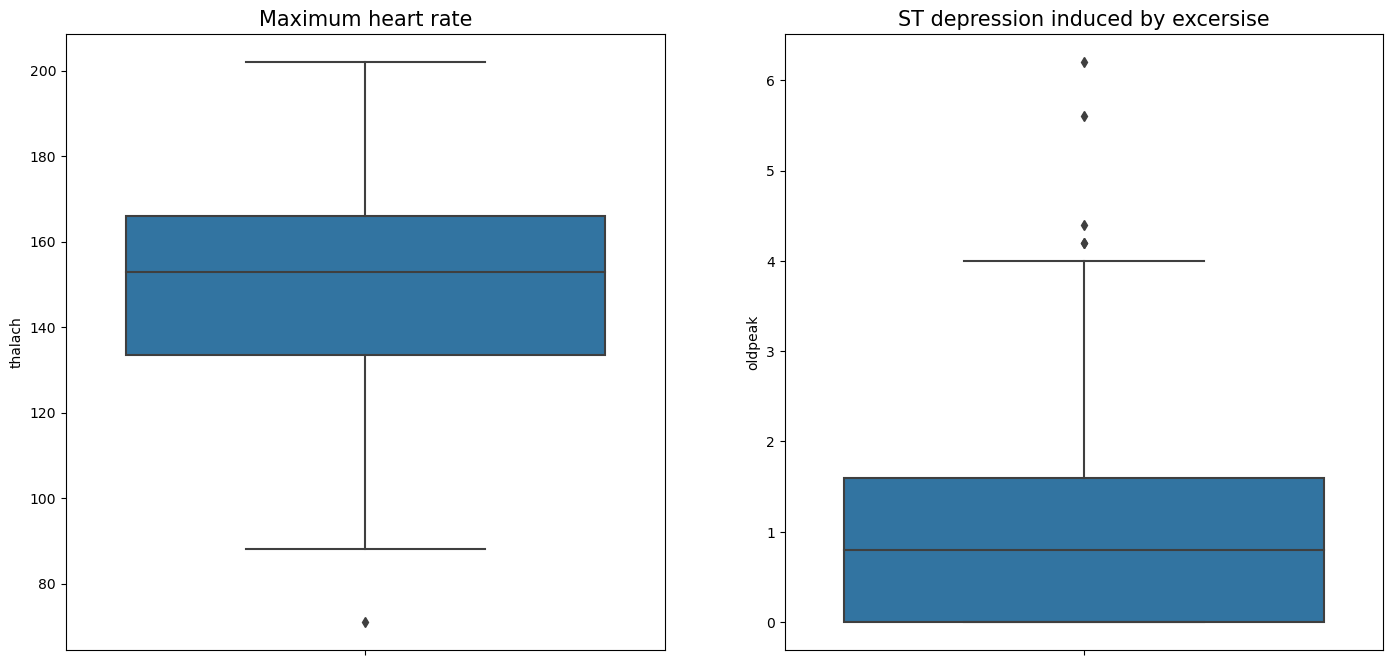

In [72]:
plt.figure(figsize=(17,5)) 
plt.subplot(1,3,1) 
sns.boxplot(y= data['age']) 
plt.title('Age', fontsize=15)
plt.subplot(1,3,2) 
sns.boxplot(y= data['trestbps'])
plt.title('Resting blood pressure', fontsize=15)
plt.subplot(1,3,3)
sns.boxplot(y= data['chol'])
plt.title('Cholestrol level', fontsize=15) 
plt.show()

plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.boxplot(y= data['thalach'])
plt.title('Maximum heart rate', fontsize=15) 
plt.subplot(1,2,2) 
sns.boxplot(y= data['oldpeak'])
plt.title('ST depression induced by excersise', fontsize=15)
plt.show()

In [73]:
# Separate independent and dependent var
# Create train and test set
# Scaling 
# Applying classification algo
# Evaluate the model

In [74]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
# Separate independent and dependent var
X=data.drop(['target'],axis=1)
y=data['target']

In [77]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [79]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [80]:
# Create train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [81]:
X_train.shape

(212, 13)

In [84]:
X_test.shape

(91, 13)

In [85]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [87]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [91]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [92]:
X_train

array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

In [93]:
# create the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [94]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred=log_reg.predict(X_test)

In [96]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [97]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: target, Length: 91, dtype: int64

In [98]:
y_pred.shape

(91,)

In [99]:
y_test.shape

(91,)

In [100]:
# Evaluate Machine Learning Model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[32  9]
 [ 6 44]]


In [101]:
# print accuracy & classification report
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.8351648351648352


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

